In [4]:
#%% packages
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import math
from sklearn import neighbors
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
from sklearn.cross_validation import train_test_split

In [5]:
#%% data
iris_df = pd.read_table('/Users/amybrown/Thinkful/Unit_4/Lesson_3/curric-data-001-data-sets/iris/iris.data.csv', sep=',', 
                        names=('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'))

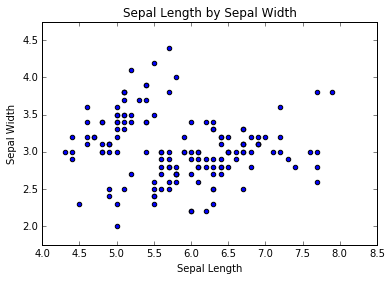

In [13]:
#%% plot sepal length by sepal width
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'])
plt.axis("equal")
plt.title("Sepal Length by Sepal Width")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

### The first part of this assignment asks us to plot sepal length by width from the Iris dataset. Then pick a point at random and calculate the distance from each observation to that point. Then, subset the 10 nearest points and determine the majority class from them. 

In [14]:
# pick a new point at random
sepal_df = iris_df[['sepal_length', 'sepal_width']]
#obs = sepal_df.sample(n=1) when I did this it resulted in point 108, not sure how to save that result

In [15]:
# sort each point by distance to random point and subset 10 nearest points
sepal_list = sepal_df.values.tolist()
distances = euclidean_distances(sepal_list, [[6.7, 2.5]]) # this is the location of the randomly selected point

In [17]:
# create final dataset that includes distance variable
d  = distances.reshape((150,1))
d2 = pd.DataFrame(data=d, columns=['distance'])
final = pd.concat([iris_df, d2], axis=1)
final = final.sort_values(by='distance')

In [20]:
# subset top 10 points (excluding first point, which is the randomly selected observation)
top10 = final[1:11]
print(top10)

     sepal_length  sepal_width  petal_length  petal_width            class  \
76            6.8          2.8           4.8          1.4  Iris-versicolor   
54            6.5          2.8           4.6          1.5  Iris-versicolor   
111           6.4          2.7           5.3          1.9   Iris-virginica   
146           6.3          2.5           5.0          1.9   Iris-virginica   
72            6.3          2.5           4.9          1.5  Iris-versicolor   
58            6.6          2.9           4.6          1.3  Iris-versicolor   
128           6.4          2.8           5.6          2.1   Iris-virginica   
132           6.4          2.8           5.6          2.2   Iris-virginica   
87            6.3          2.3           4.4          1.3  Iris-versicolor   
123           6.3          2.7           4.9          1.8   Iris-virginica   

     distance  
76   0.316228  
54   0.360555  
111  0.360555  
146  0.400000  
72   0.400000  
58   0.412311  
128  0.424264  
132  0.424264

### There is a tie amongst the top 10 observations for the class distinction of either versicolor or virginica. The majority class is contingent on the size k. So, a k of 3 would result in a majority class of versicolor. 

### The next portion of the assignment asks to generate a knn model and output the results. 

In [21]:
X = np.array(iris_df.ix[:, 0:4])
y = np.array(iris_df['class']) 

In [22]:
# split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
# define model
knn = KNeighborsClassifier(n_neighbors=3)
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [27]:
# predict the response
pred = knn.predict(X_test)

In [28]:
# evaluate accuracy
print(accuracy_score(y_test, pred))

0.98
